In [1]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import xml.etree.ElementTree as ET
import pytz

In [5]:
tree = ET.parse(r'./v.xml')
root = tree.getroot()

In [6]:
data_list = []

# Loop through Record elements
for record in root.findall(".//Record"):
    record_data = {
        "type": record.get("type"),
        "sourceName": record.get("sourceName"),
        "creationDate": record.get("creationDate"),
        "startDate": record.get("startDate"),
        "endDate": record.get("endDate"),
        "value": record.get("value")
    }
    
    # Extract additional data from MetadataEntry, if present
    metadata_entries = record.findall(".//MetadataEntry")
    for entry in metadata_entries:
        key = entry.get("key")
        value = entry.get("value")
        record_data[key] = value

    data_list.append(record_data)

# Create a DataFrame from the list of record data
df = pd.DataFrame(data_list)

# Now you have a pandas DataFrame containing the extracted data
df

,type,sourceName,creationDate,startDate,endDate,value,HKMetadataKeyHeartRateMotionContext,HKMetadataKeySyncVersion,HKMetadataKeySyncIdentifier,HKVO2MaxTestType,HKDateOfEarliestDataUsedForEstimate,HKMetadataKeyAppleDeviceCalibrated,HKMetadataKeyDevicePlacementSide,HKTimeZone,HKWasUserEntered,HKMenstrualCycleStart,HKSexualActivityProtectionUsed,HKMetadataKeyAudioExposureLevel,HKMetadataKeyAudioExposureDuration,HKAlgorithmVersion
0,HKQuantityTypeIdentifierHeight,iPhone,2022-03-08 23:22:39 -0700,2022-03-08 23:22:39 -0700,2022-03-08 23:22:39 -0700,5.41667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HKQuantityTypeIdentifierBodyMass,iPhone,2022-03-08 23:22:40 -0700,2022-03-08 23:22:40 -0700,2022-03-08 23:22:40 -0700,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HKQuantityTypeIdentifierHeartRate,Vanessa’s Apple Watch,2022-07-22 08:55:26 -0700,2022-07-22 08:53:11 -0700,2022-07-22 08:53:11 -0700,85,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HKQuantityTypeIdentifierHeartRate,Vanessa’s Apple Watch,2022-07-22 08:59:36 -0700,2022-07-22 08:59:35 -0700,2022-07-22 08:59:35 -0700,130,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HKQuantityTypeIdentifierHeartRate,Vanessa’s Apple Watch,2022-07-22 08:59:44 -0700,2022-07-22 08:55:56 -0700,2022-07-22 08:55:56 -0700,68,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372188,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Vanessa’s Apple Watch,2023-09-05 10:13:10 -0700,2023-09-05 10:12:09 -0700,2023-09-05 10:13:03 -0700,20.8113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
372189,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Vanessa’s Apple Watch,2023-09-05 14:42:48 -0700,2023-09-05 14:41:47 -0700,2023-09-05 14:42:47 -0700,20.0909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
372190,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Vanessa’s Apple Watch,2023-09-05 18:09:53 -0700,2023-09-05 18:08:52 -0700,2023-09-05 18:09:52 -0700,14.813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
372191,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Vanessa’s Apple Watch,2023-09-07 12:36:28 -0700,2023-09-07 12:35:27 -0700,2023-09-07 12:36:25 -0700,19.2586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [7]:
df.set_index('creationDate')

,type,sourceName,startDate,endDate,value,HKMetadataKeyHeartRateMotionContext,HKMetadataKeySyncVersion,HKMetadataKeySyncIdentifier,HKVO2MaxTestType,HKDateOfEarliestDataUsedForEstimate,HKMetadataKeyAppleDeviceCalibrated,HKMetadataKeyDevicePlacementSide,HKTimeZone,HKWasUserEntered,HKMenstrualCycleStart,HKSexualActivityProtectionUsed,HKMetadataKeyAudioExposureLevel,HKMetadataKeyAudioExposureDuration,HKAlgorithmVersion
creationDate,,,,,,,,,,,,,,,,,,,
2022-03-08 23:22:39 -0700,HKQuantityTypeIdentifierHeight,iPhone,2022-03-08 23:22:39 -0700,2022-03-08 23:22:39 -0700,5.41667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-08 23:22:40 -0700,HKQuantityTypeIdentifierBodyMass,iPhone,2022-03-08 23:22:40 -0700,2022-03-08 23:22:40 -0700,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-22 08:55:26 -0700,HKQuantityTypeIdentifierHeartRate,Vanessa’s Apple Watch,2022-07-22 08:53:11 -0700,2022-07-22 08:53:11 -0700,85,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-22 08:59:36 -0700,HKQuantityTypeIdentifierHeartRate,Vanessa’s Apple Watch,2022-07-22 08:59:35 -0700,2022-07-22 08:59:35 -0700,130,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-22 08:59:44 -0700,HKQuantityTypeIdentifierHeartRate,Vanessa’s Apple Watch,2022-07-22 08:55:56 -0700,2022-07-22 08:55:56 -0700,68,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-05 10:13:10 -0700,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Vanessa’s Apple Watch,2023-09-05 10:12:09 -0700,2023-09-05 10:13:03 -0700,20.8113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2023-09-05 14:42:48 -0700,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Vanessa’s Apple Watch,2023-09-05 14:41:47 -0700,2023-09-05 14:42:47 -0700,20.0909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2023-09-05 18:09:53 -0700,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Vanessa’s Apple Watch,2023-09-05 18:08:52 -0700,2023-09-05 18:09:52 -0700,14.813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [8]:
# Initialize lists to store data
heart_rate_data = []
spo2_data = []
pressure_data = []
vo2max_data = []
creation_date_data = []  # Add a list for creation dates

# Iterate through the XML elements and extract data
for record in root.findall(".//Record"):
    record_type = record.get("type")
    
    if "HeartRate" in record_type:
        heart_rate = float(record.get("value"))
        heart_rate_data.append(heart_rate)
    
    elif "OxygenSaturation" in record_type:
        spo2 = float(record.get("value"))
        spo2_data.append(spo2)
        
        # Extract barometric pressure if available
        barometric_pressure = record.find(".//MetadataEntry[@key='HKMetadataKeyBarometricPressure']")
        if barometric_pressure is not None:
            pressure = float(barometric_pressure.get("value").split()[0])
            pressure_data.append(pressure)
    
    elif "VO2Max" in record_type:
        vo2max = float(record.get("value"))
        vo2max_data.append(vo2max)
    
    # Extract creation date
    creation_date = record.get("creationDate")
    creation_date_data.append(creation_date)

# Find the maximum length of the lists
max_length = max(len(heart_rate_data), len(spo2_data), len(pressure_data), len(vo2max_data), len(creation_date_data))

# Fill lists with NaN to make them the same length
def fill_with_nan(lst, max_length):
    while len(lst) < max_length:
        lst.append(float('nan'))

fill_with_nan(heart_rate_data, max_length)
fill_with_nan(spo2_data, max_length)
fill_with_nan(pressure_data, max_length)
fill_with_nan(vo2max_data, max_length)
fill_with_nan(creation_date_data, max_length)

# Create a DataFrame from the lists
df = pd.DataFrame({
    'HeartRate': heart_rate_data,
    'BloodOxygen': spo2_data,
    'BarometricPressure': pressure_data,
    'VO2Max': vo2max_data,
    'CreationDate': creation_date_data
})

# Now you have a pandas DataFrame containing the extracted data with NaN for missing values
print(df.head())

   HeartRate  BloodOxygen  BarometricPressure  VO2Max  \
0       85.0          NaN                 NaN   30.06   
1      130.0          NaN                 NaN   30.67   
2       68.0          NaN                 NaN   31.70   
3      120.0          NaN                 NaN     NaN   
4      126.0          NaN                 NaN     NaN   

                CreationDate  
0  2022-03-08 23:22:39 -0700  
1  2022-03-08 23:22:40 -0700  
2  2022-07-22 08:55:26 -0700  
3  2022-07-22 08:59:36 -0700  
4  2022-07-22 08:59:44 -0700  


In [9]:
df

,HeartRate,BloodOxygen,BarometricPressure,VO2Max,CreationDate
0,85.0,NaN,NaN,30.06,2022-03-08 23:22:39 -0700
1,130.0,NaN,NaN,30.67,2022-03-08 23:22:40 -0700
2,68.0,NaN,NaN,31.70,2022-07-22 08:55:26 -0700
3,120.0,NaN,NaN,NaN,2022-07-22 08:59:36 -0700
4,126.0,NaN,NaN,NaN,2022-07-22 08:59:44 -0700
...,...,...,...,...,...
372188,NaN,NaN,NaN,NaN,2023-09-05 10:13:10 -0700
372189,NaN,NaN,NaN,NaN,2023-09-05 14:42:48 -0700
372190,NaN,NaN,NaN,NaN,2023-09-05 18:09:53 -0700
372191,NaN,NaN,NaN,NaN,2023-09-07 12:36:28 -0700


In [10]:
# Convert CreationDate column to datetime
df['CreationDate'] = pd.to_datetime(df['CreationDate'], format='%Y-%m-%d %H:%M:%S %z')

# Define the reference date with a specific time zone (UTC in this case)
reference_date = pd.Timestamp('2023-09-10 06:00:36 -0700', tz=pytz.timezone('UTC'))

# Calculate the time difference in days
df['day'] = (df['CreationDate'] - reference_date).dt.days

In [11]:
df = df.set_index('day')

In [12]:
df

,HeartRate,BloodOxygen,BarometricPressure,VO2Max,CreationDate
day,,,,,
-551,85.0,NaN,NaN,30.06,2022-03-08 23:22:39-07:00
-551,130.0,NaN,NaN,30.67,2022-03-08 23:22:40-07:00
-415,68.0,NaN,NaN,31.70,2022-07-22 08:55:26-07:00
-415,120.0,NaN,NaN,NaN,2022-07-22 08:59:36-07:00
-415,126.0,NaN,NaN,NaN,2022-07-22 08:59:44-07:00
...,...,...,...,...,...
-5,NaN,NaN,NaN,NaN,2023-09-05 10:13:10-07:00
-5,NaN,NaN,NaN,NaN,2023-09-05 14:42:48-07:00
-5,NaN,NaN,NaN,NaN,2023-09-05 18:09:53-07:00


Text(0, 0.5, 'HR (bpm)')

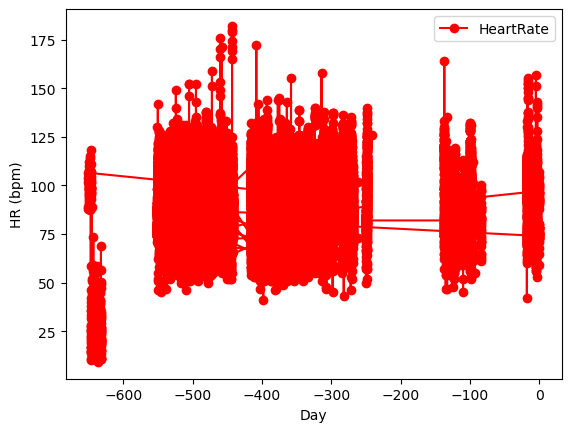

In [13]:
fig, ax = plt.subplots()
df.plot.line(ax = ax, y = 'HeartRate',color = 'r', marker = 'o')
ax.set_xlabel("Day")
ax.set_ylabel("HR (bpm)")

Text(0, 0.5, 'VO2Max (mL/kg/min)')

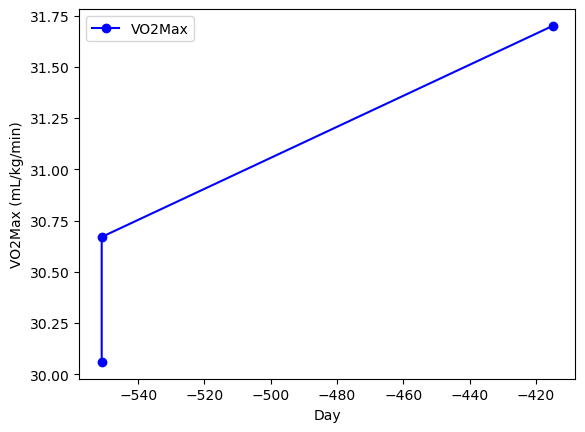

In [14]:
fig, ax = plt.subplots()
df.plot.line(ax = ax, y = 'VO2Max',color = 'b', marker = 'o')
ax.set_xlabel("Day")
ax.set_ylabel("VO2Max (mL/kg/min)")